# Classification Analysis on Wine Data set

********

In [116]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

In [117]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

## Wine Quality Dataset

*********

In [118]:
# Loading the dataset and printing out a few lines to get a better understanding of the data
red=pd.read_csv("winequality-red.csv",sep=";")
#white=pd.read_csv("winequality-white.csv",sep=";")

In [119]:

red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [120]:
#Inspecting the data types and look for instances of missing or possibly errant data.
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [121]:
# Summary statistics.
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [122]:
# Group by typically takes a categorical variable.
x = red.groupby('quality')
x

In [123]:
# Pivot tables.
x.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [124]:
# create color array for red dataframe
color_red = np.repeat('red', len(red), axis=None)



In [125]:
red['color'] = color_red
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## Visualisation

*****

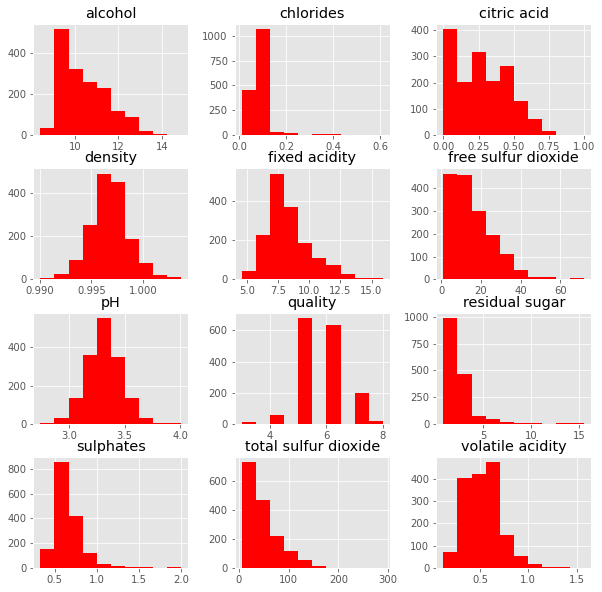

In [126]:
# Hist plots and kdes.
red.hist(color='red',figsize=(10,10));

''

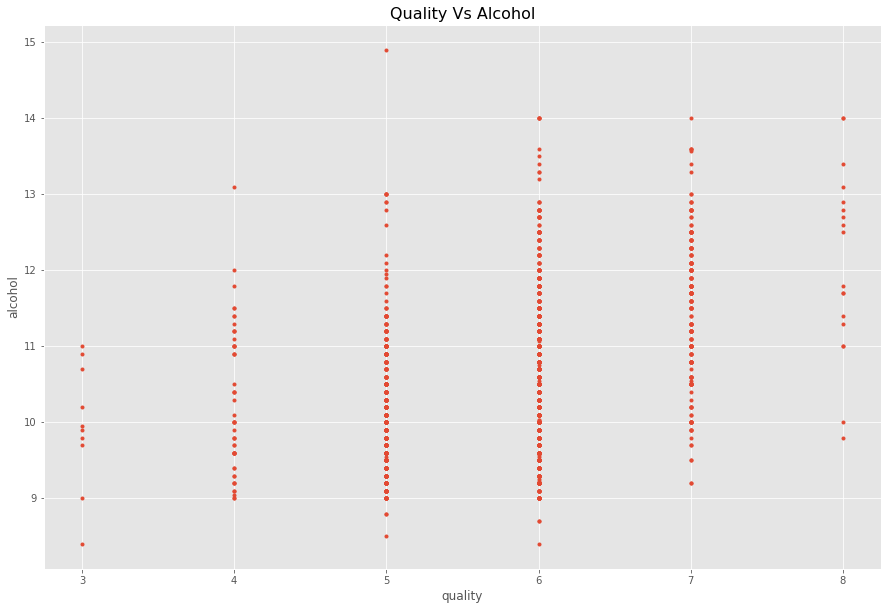

In [127]:
# New figure.
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(red['quality'], red['alcohol'], '.')

# Set axis labels.
ax.set_title('Quality Vs Alcohol',fontsize=16)
ax.set_xlabel('quality');
ax.set_ylabel('alcohol');
;


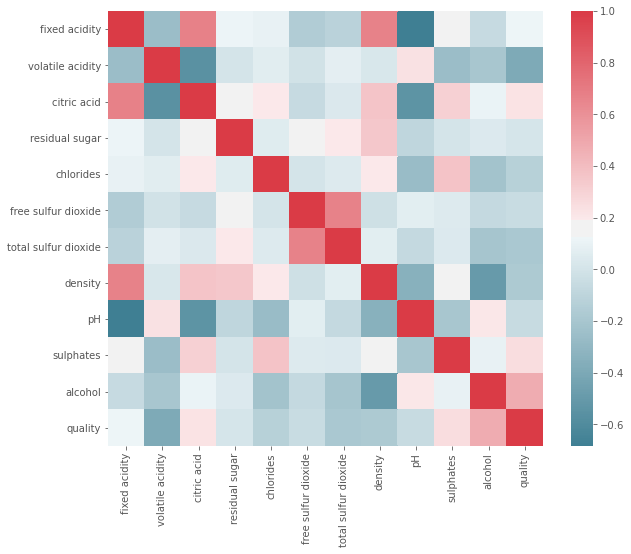

In [128]:
f, ax = plt.subplots(figsize=(10, 8))
corr = red.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

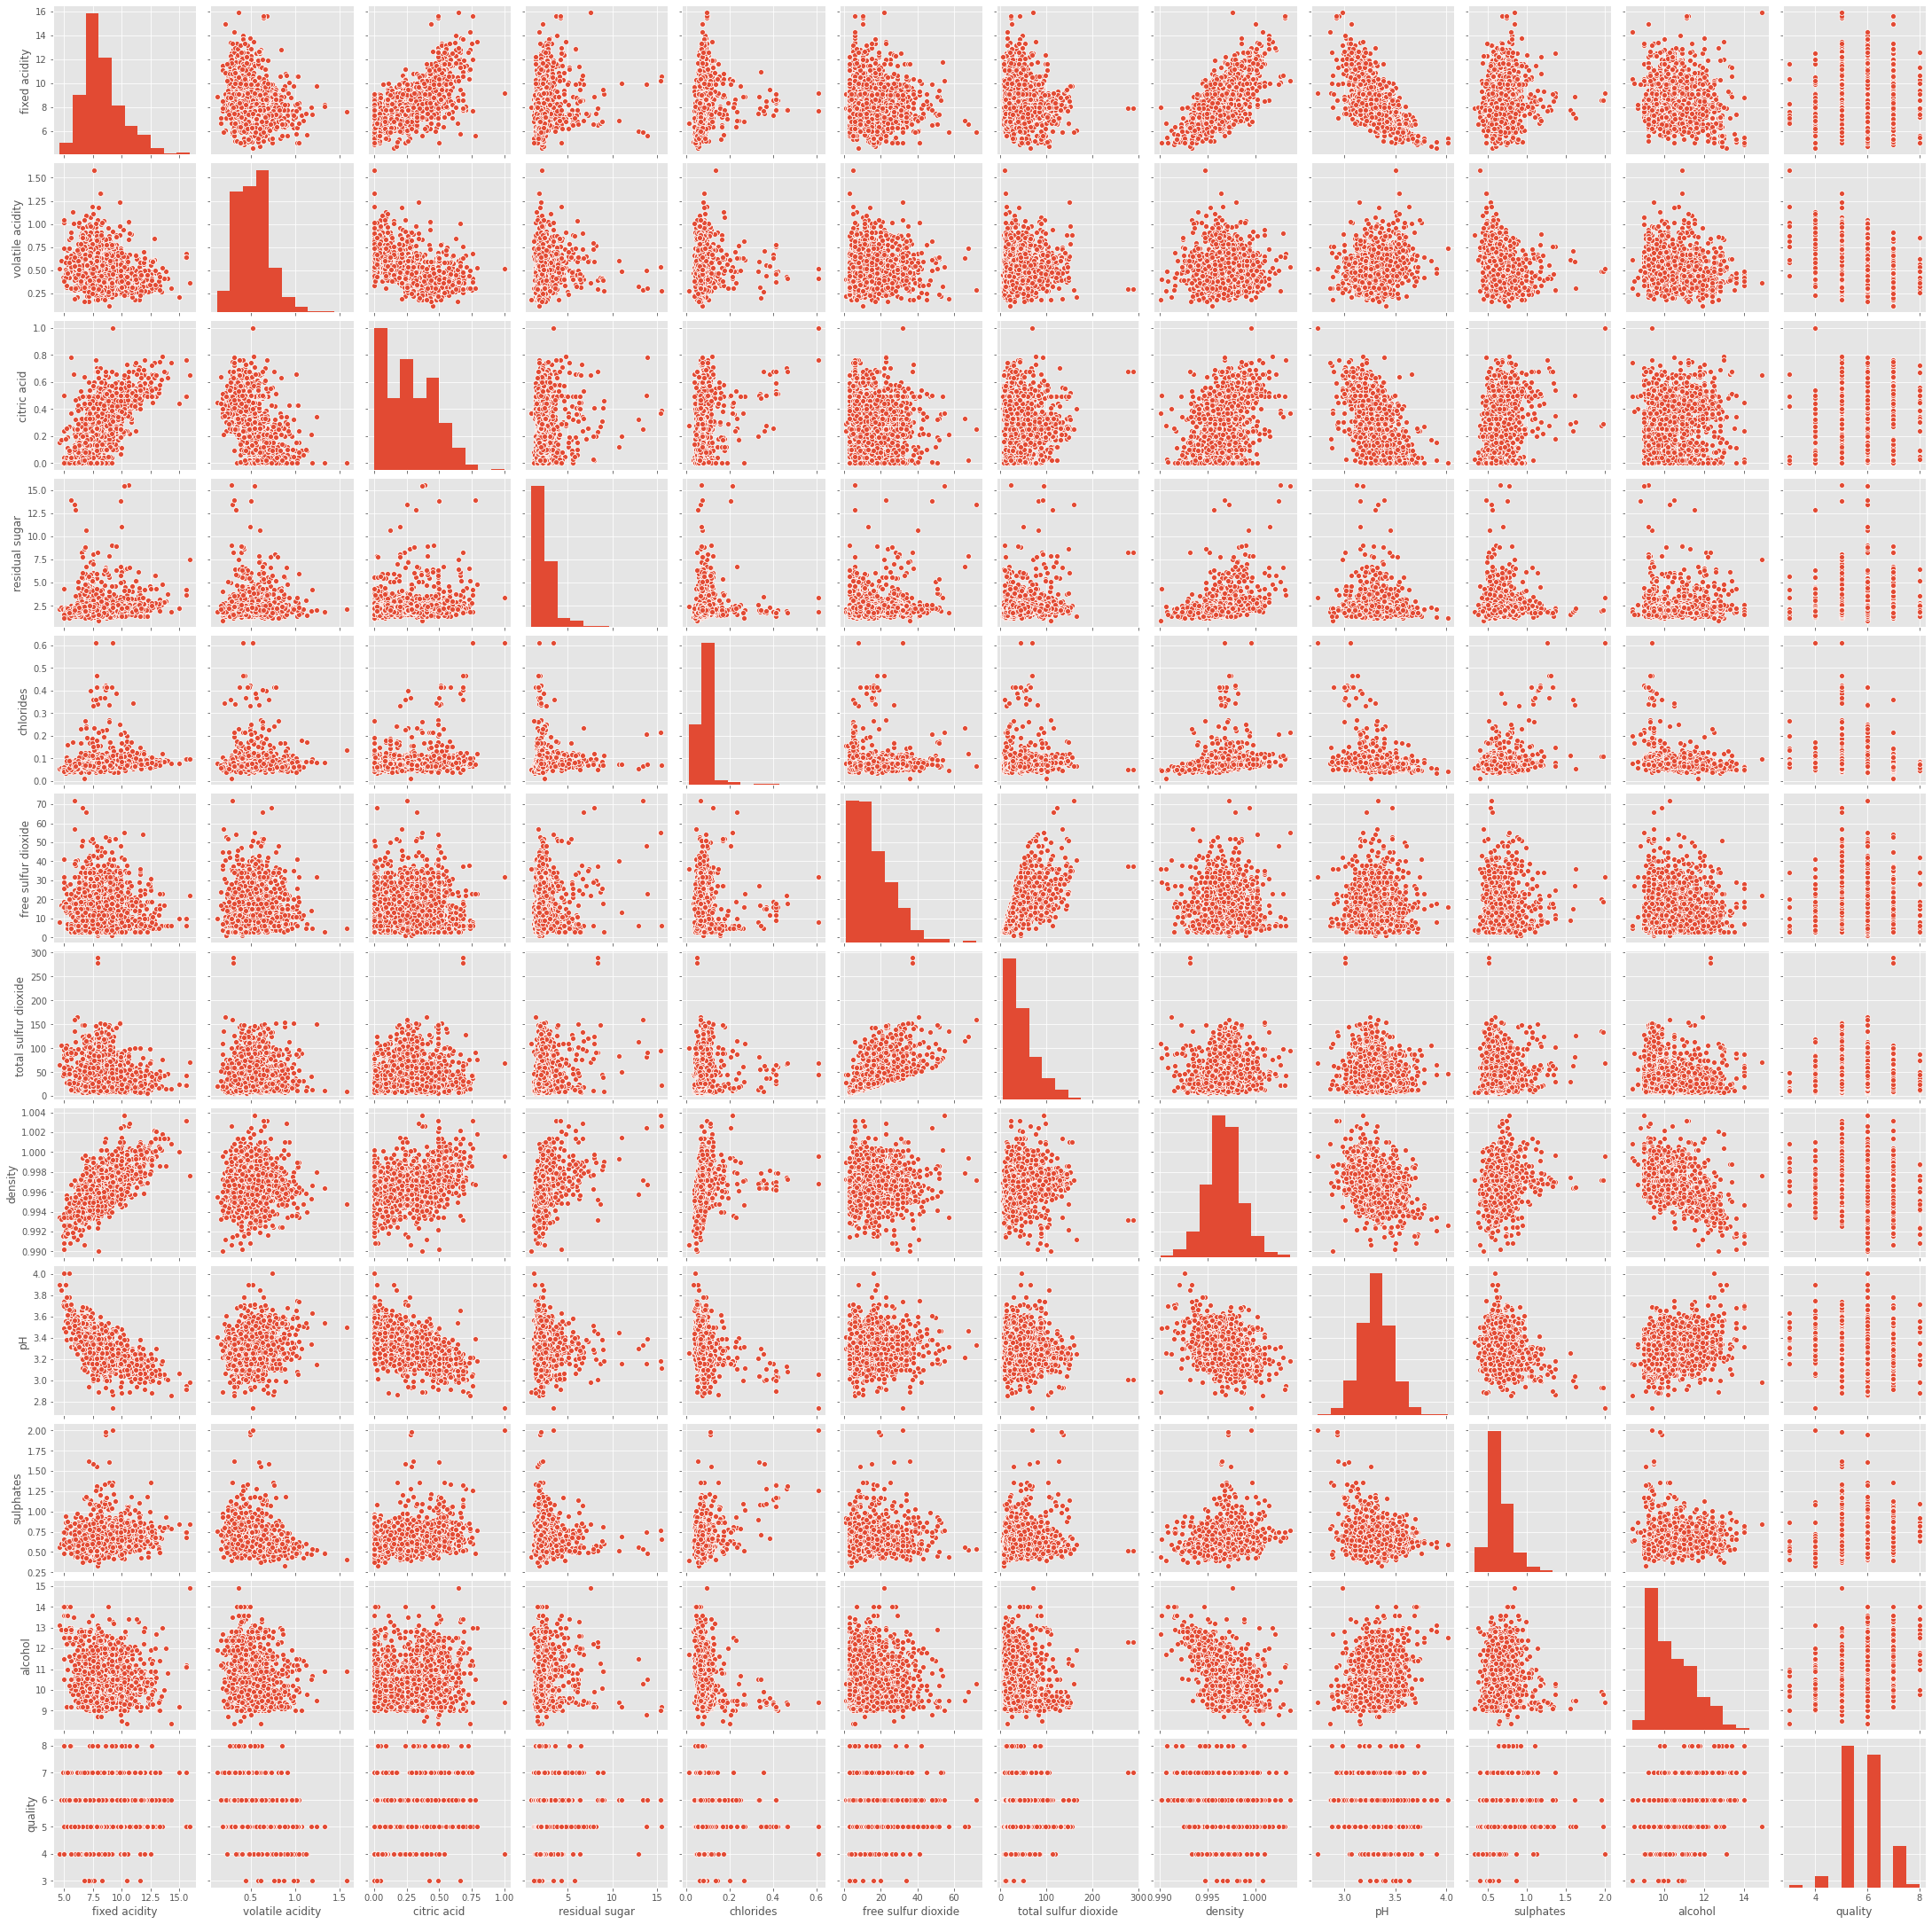

In [129]:
sns.pairplot(red)

In [130]:
# Looping through groupby().
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: '3'
j looks like:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
459           11.6             0.580         0.66            2.20      0.074   
517           10.4             0.610         0.49            2.10      0.200   
690            7.4             1.185         0.00            4.25      0.097   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
459                 10.0                  47.0   1.0008  3.25       0.57   
517                  5.0                  16.0   0.9994  3.16       0.63   
690                  5.0                  14.0   0.9966  3.63       0.54   

     alcohol  quality color  
459      9.0        3   red  
517      8.4        3   red  
690     10.7        3   red  


i is: '4'
j looks like:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
18            7.4              0.59         0.08             4.4      0.086   
38            5.7              1.13         0

## Test and Train Split

****

In [132]:
# Split the data frame in two.
train, test = mod.train_test_split(red)

In [133]:
# Show some training data.
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1287,8.0,0.60,0.08,2.6,0.056,3.0,7.0,0.99286,3.22,0.37,13.0,5,red
1162,8.5,0.32,0.42,2.3,0.075,12.0,19.0,0.99434,3.14,0.71,11.8,7,red
853,9.3,0.36,0.39,1.5,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,6,red
695,5.1,0.47,0.02,1.3,0.034,18.0,44.0,0.99210,3.90,0.62,12.8,6,red
1005,6.8,0.36,0.32,1.8,0.067,4.0,8.0,0.99280,3.36,0.55,12.8,7,red


In [134]:
# The indices of the train array.
train.index

Int64Index([1287, 1162,  853,  695, 1005,  121,  639,  231,  474, 1223,
            ...
             378,  618,  221,  834, 1341,  407, 1450,  346,  562, 1053],
           dtype='int64', length=1199)

In [135]:
# Show some testing data.
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1500,7.5,0.725,0.04,1.5,0.076,8.0,15.0,0.99508,3.26,0.53,9.6,5,red
507,11.2,0.670,0.55,2.3,0.084,6.0,13.0,1.00000,3.17,0.71,9.5,6,red
1094,6.6,0.725,0.09,5.5,0.117,9.0,17.0,0.99655,3.35,0.49,10.8,6,red
972,10.1,0.380,0.50,2.4,0.104,6.0,13.0,0.99643,3.22,0.65,11.6,7,red
1202,8.6,0.420,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8,red


In [136]:
test.index.size

400


## Two Dimensions: Test Train Split

****

In [144]:
# Give the inputs and outputs convenient names.
inputs, outputs = train[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']], train['quality']

In [145]:
# Peek at the inputs.
inputs.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1287,8.0,0.60,0.08,2.6,0.056,3.0,7.0,0.99286,3.22,0.37,13.0
1162,8.5,0.32,0.42,2.3,0.075,12.0,19.0,0.99434,3.14,0.71,11.8
853,9.3,0.36,0.39,1.5,0.080,41.0,55.0,0.99652,3.47,0.73,10.9
695,5.1,0.47,0.02,1.3,0.034,18.0,44.0,0.99210,3.90,0.62,12.8
1005,6.8,0.36,0.32,1.8,0.067,4.0,8.0,0.99280,3.36,0.55,12.8


In [146]:
# Peek at the outputs.
outputs.head()

1287    5
1162    7
853     6
695     6
1005    7
Name: quality, dtype: int64

## Two Dimensions: Logistic regression

******


https://nbviewer.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/main/iris-classification.ipynb

https://github.com/Saloni3108/Classification---Wine-Quality-Dataset/blob/main/2.%20Logistic%20Regression.ipynb

In [156]:
# Create a new classifier.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# Train the classifier on our data.
lr.fit(inputs, outputs_train)

C:\Users\chimezie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [158]:
# Ask the classifier to classify the test data
outputs_pred = lr.predict(inputs)
outputs_pred

array([6, 6, 6, ..., 6, 5, 6], dtype=int64)

In [154]:
outputs_train = lr.predict(inputs)

In [159]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(outputs,outputs_pred)

array([[  0,   0,   6,   1,   0,   0],
       [  0,   1,  29,  15,   0,   0],
       [  0,   1, 394, 113,   1,   0],
       [  0,   1, 169, 303,   0,   0],
       [  0,   0,  13, 138,   1,   0],
       [  0,   0,   0,  13,   0,   0]], dtype=int64)

In [160]:
# classification report
rep = classification_report(outputs,outputs_pred)
print('Report of wine dataset')
print(rep)

Report of wine dataset
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.33      0.02      0.04        45
           5       0.64      0.77      0.70       509
           6       0.52      0.64      0.57       473
           7       0.50      0.01      0.01       152
           8       0.00      0.00      0.00        13

    accuracy                           0.58      1199
   macro avg       0.33      0.24      0.22      1199
weighted avg       0.55      0.58      0.53      1199



C:\Users\chimezie\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [172]:
rep = classification_report(outputs,outputs_train)
print('Report of wine dataset')
print(rep)

Report of wine dataset
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.25      0.02      0.04        45
           5       0.65      0.78      0.71       509
           6       0.52      0.63      0.57       473
           7       0.38      0.02      0.04       152
           8       0.00      0.00      0.00        13

    accuracy                           0.58      1199
   macro avg       0.30      0.24      0.23      1199
weighted avg       0.54      0.58      0.53      1199



C:\Users\chimezie\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
#Boosting - To overcome Overfitting of Training dataset
from sklearn.ensemble import AdaBoostClassifier

In [164]:
adb = AdaBoostClassifier(LogisticRegression(),n_estimators=5,learning_rate=1)
adb.fit(inputs,outputs_train)

C:\Users\chimezie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\chimezie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=1,
                   n_estimators=5)

In [170]:
adb.score(inputs,outputs)

0.5446205170975813

In [168]:
adb.score(inputs,outputs_train)

0.8523769808173478